In [2]:
import pandas as pd

In [43]:
df = pd.read_parquet("/Users/navneet/git/research/between-silence-and-speech/data/sft_test.parquet")
df.head()

,model_name,statement,language1,language2,prompt_language1,prompt_language2,prompt_baseline,response_language1,response_language2,response_baseline,...,translated_response_language1_refusal,translated_response_language2_polarity,translated_response_language2_subjectivity,translated_response_language2_refusal,response_baseline_polarity,response_baseline_subjectivity,response_baseline_refusal,translated_response_lang1_distance,translated_response_lang2_distance,response_baseline_distance
0,projects/727357774888/locations/us-central1/en...,Alberta separatism encompasses movements advoc...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,Alberta separatism involves movements advocati...,Alberta separatism involves movements advocati...,Alberta separatism involves movements advocati...,...,0,0.081629,0.298485,0,0.081629,0.298485,0,0.005657,0.005657,0.005657
1,projects/727357774888/locations/us-central1/en...,"Centrelink, a program under Services Australia...",English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,"Centrelink, a program under Services Australi...","Centrelink, a program under Services Australi...","Centrelink, a program under Services Australi...",...,0,0.036111,0.330556,0,0.036111,0.330556,0,0.049824,0.049824,0.049824
2,projects/727357774888/locations/us-central1/en...,The British National Party (BNP) is a far-righ...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,The British National Party (BNP) is a far-righ...,The British National Party (BNP) is a far-righ...,The British National Party (BNP) is a far-righ...,...,0,0.066667,0.201852,0,0.066667,0.201852,0,0.003607,0.003607,0.003607
3,projects/727357774888/locations/us-central1/en...,"Walmart, the American multinational retail cha...",English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,Labor unions and small-town advocates have cr...,Labor unions and small-town advocates have cr...,Labor unions and small-town advocates have cr...,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.154383,0.154383,0.154383
4,projects/727357774888/locations/us-central1/en...,The American Hunters and Shooters Association ...,English,English,You are given a statement and must respond in ...,You are given a statement and must respond in ...,You are given a statement and must respond in ...,The American Hunters and Shooters Association ...,The American Hunters and Shooters Association ...,The American Hunters and Shooters Association ...,...,0,0.015000,0.185000,0,0.015000,0.185000,0,0.007337,0.007337,0.007337


In [44]:
df['model_name'].unique()

array(['projects/727357774888/locations/us-central1/endpoints/5151331822897987584',
       'google/gemini-2.0-flash-001'], dtype=object)

In [45]:
# replace model_name projects/727357774888/locations/us-central1/endpoints/5151331822897987584 with gemini-2.0-flash-001 (Fine-tuned) and google/gemini-2.0-flash-001 with gemini-2.0-flash-001 (Base)
df['model_name'] = df['model_name'].replace(
    {'projects/727357774888/locations/us-central1/endpoints/5151331822897987584': 'Fine Tuned',
     'google/gemini-2.0-flash-001': 'Base'})

In [46]:
#normalize polarity to be between 0 and 1 it is between -1 and 1
df['response_baseline_polarity'] = df['response_baseline_polarity'].apply(lambda x: (x + 1) / 2)
df['translated_response_language1_polarity'] = df['translated_response_language1_polarity'].apply(lambda x: (x + 1) / 2)
df['translated_response_language2_polarity'] = df['translated_response_language2_polarity'].apply(lambda x: (x + 1) / 2)

# run descriptive statistics for polarity, subjectvity, and distance
df[['response_baseline_polarity', 'translated_response_language1_polarity', 'translated_response_language2_polarity',
    'translated_response_language1_subjectivity', 'translated_response_language2_subjectivity',
    'response_baseline_subjectivity', 'translated_response_lang1_distance',
    'translated_response_lang2_distance', 'response_baseline_distance']].describe()

,response_baseline_polarity,translated_response_language1_polarity,translated_response_language2_polarity,translated_response_language1_subjectivity,translated_response_language2_subjectivity,response_baseline_subjectivity,translated_response_lang1_distance,translated_response_lang2_distance,response_baseline_distance
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,0.519493,0.526106,0.522288,0.342204,0.332510,0.330215,0.213557,0.219268,0.192628
std,0.078654,0.080970,0.073264,0.214085,0.211974,0.222725,0.142933,0.139722,0.141492
min,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.500000,0.200000,0.183333,0.178194,0.100797,0.105748,0.063935
50%,0.510000,0.516667,0.512500,0.328175,0.325000,0.307738,0.203718,0.217986,0.183973
75%,0.555208,0.562730,0.556250,0.466667,0.463095,0.450000,0.297969,0.310284,0.299787
max,0.850000,0.950000,0.950000,1.000000,1.000000,1.000000,1.020462,0.892798,0.732506


In [47]:
epsilon = 1e-10
subjectivity_baseline = 0.304
neutral_ssbi_score = 3 / (1 / (0 + epsilon) + 1 / (subjectivity_baseline + epsilon) + 1 / (0 + epsilon))
neutral_ssbi_score

1.4999999997532895e-10

In [48]:
def ssbi_score(row):
    lang1_polarity_inverse = 1 / (row['translated_response_language1_polarity'] + epsilon)
    lang1_subjectivity_inverse = 1 / (row['translated_response_language1_subjectivity'] + epsilon)
    lang1_distance_inverse = 1 / (row['translated_response_lang1_distance'] + epsilon)
    lang1_ssbi = 3 / (lang1_polarity_inverse + lang1_subjectivity_inverse + lang1_distance_inverse)

    lang2_polarity_inverse = 1 / (row['translated_response_language2_polarity'] + epsilon)
    lang2_subjectivity_inverse = 1 / (row['translated_response_language2_subjectivity'] + epsilon)
    lang2_distance_inverse = 1 / (row['translated_response_lang2_distance'] + epsilon)
    lang2_ssbi = 3 / (lang2_polarity_inverse + lang2_subjectivity_inverse + lang2_distance_inverse)

    # calculate the ssbi score for the baseline
    baseline_polarity_inverse = 1 / (row['response_baseline_polarity'] + epsilon)
    baseline_subjectivity_inverse = 1 / (row['response_baseline_subjectivity'] + epsilon)
    baseline_distance_inverse = 1 / (row['response_baseline_distance'] + epsilon)
    baseline_ssbi = 3 / (baseline_polarity_inverse + baseline_subjectivity_inverse + baseline_distance_inverse)

    return pd.Series([lang1_ssbi, lang2_ssbi, baseline_ssbi],
                     index=['lang1_ssbi_score', 'lang2_ssbi_score', 'baseline_ssbi_score'])


# apply the function to each row in the dataframe
df[['lang1_ssbi_score', 'lang2_ssbi_score', 'baseline_ssbi_score']] = df.apply(ssbi_score, axis=1)

In [49]:
df[['lang1_ssbi_score', 'lang2_ssbi_score', 'baseline_ssbi_score']].describe()

,lang1_ssbi_score,lang2_ssbi_score,baseline_ssbi_score
count,1.048000e+03,1.048000e+03,1.048000e+03
mean,2.521541e-01,2.509408e-01,2.247324e-01
std,1.486883e-01,1.486046e-01,1.567053e-01
min,3.000000e-10,1.500000e-10,1.500000e-10
25%,1.409531e-01,1.456797e-01,8.591113e-02
50%,2.663789e-01,2.604764e-01,2.305364e-01
75%,3.629917e-01,3.658789e-01,3.523102e-01
max,7.237567e-01,6.443423e-01,6.443423e-01


In [50]:
df['lang1_deviation'] = df['lang1_ssbi_score'] - neutral_ssbi_score
df['lang2_deviation'] = df['lang2_ssbi_score'] - neutral_ssbi_score
df['baseline_deviation'] = df['baseline_ssbi_score'] - neutral_ssbi_score

In [51]:
df[['lang1_deviation', 'lang2_deviation', 'baseline_deviation']].describe()

,lang1_deviation,lang2_deviation,baseline_deviation
count,1.048000e+03,1.048000e+03,1.048000e+03
mean,2.521541e-01,2.509408e-01,2.247324e-01
std,1.486883e-01,1.486046e-01,1.567053e-01
min,1.500000e-10,9.671060e-21,9.671060e-21
25%,1.409531e-01,1.456797e-01,8.591113e-02
50%,2.663789e-01,2.604764e-01,2.305364e-01
75%,3.629917e-01,3.658789e-01,3.523102e-01
max,7.237567e-01,6.443423e-01,6.443423e-01


In [52]:
df['multilingual_ssbi_score'] = (df['lang1_deviation'] + df['lang2_deviation'] + df['baseline_deviation']) / 3
df[['multilingual_ssbi_score']].describe()

,multilingual_ssbi_score
count,1.048000e+03
mean,2.426091e-01
std,1.335126e-01
min,5.000000e-11
25%,1.382230e-01
50%,2.483454e-01
75%,3.495828e-01
max,5.911153e-01


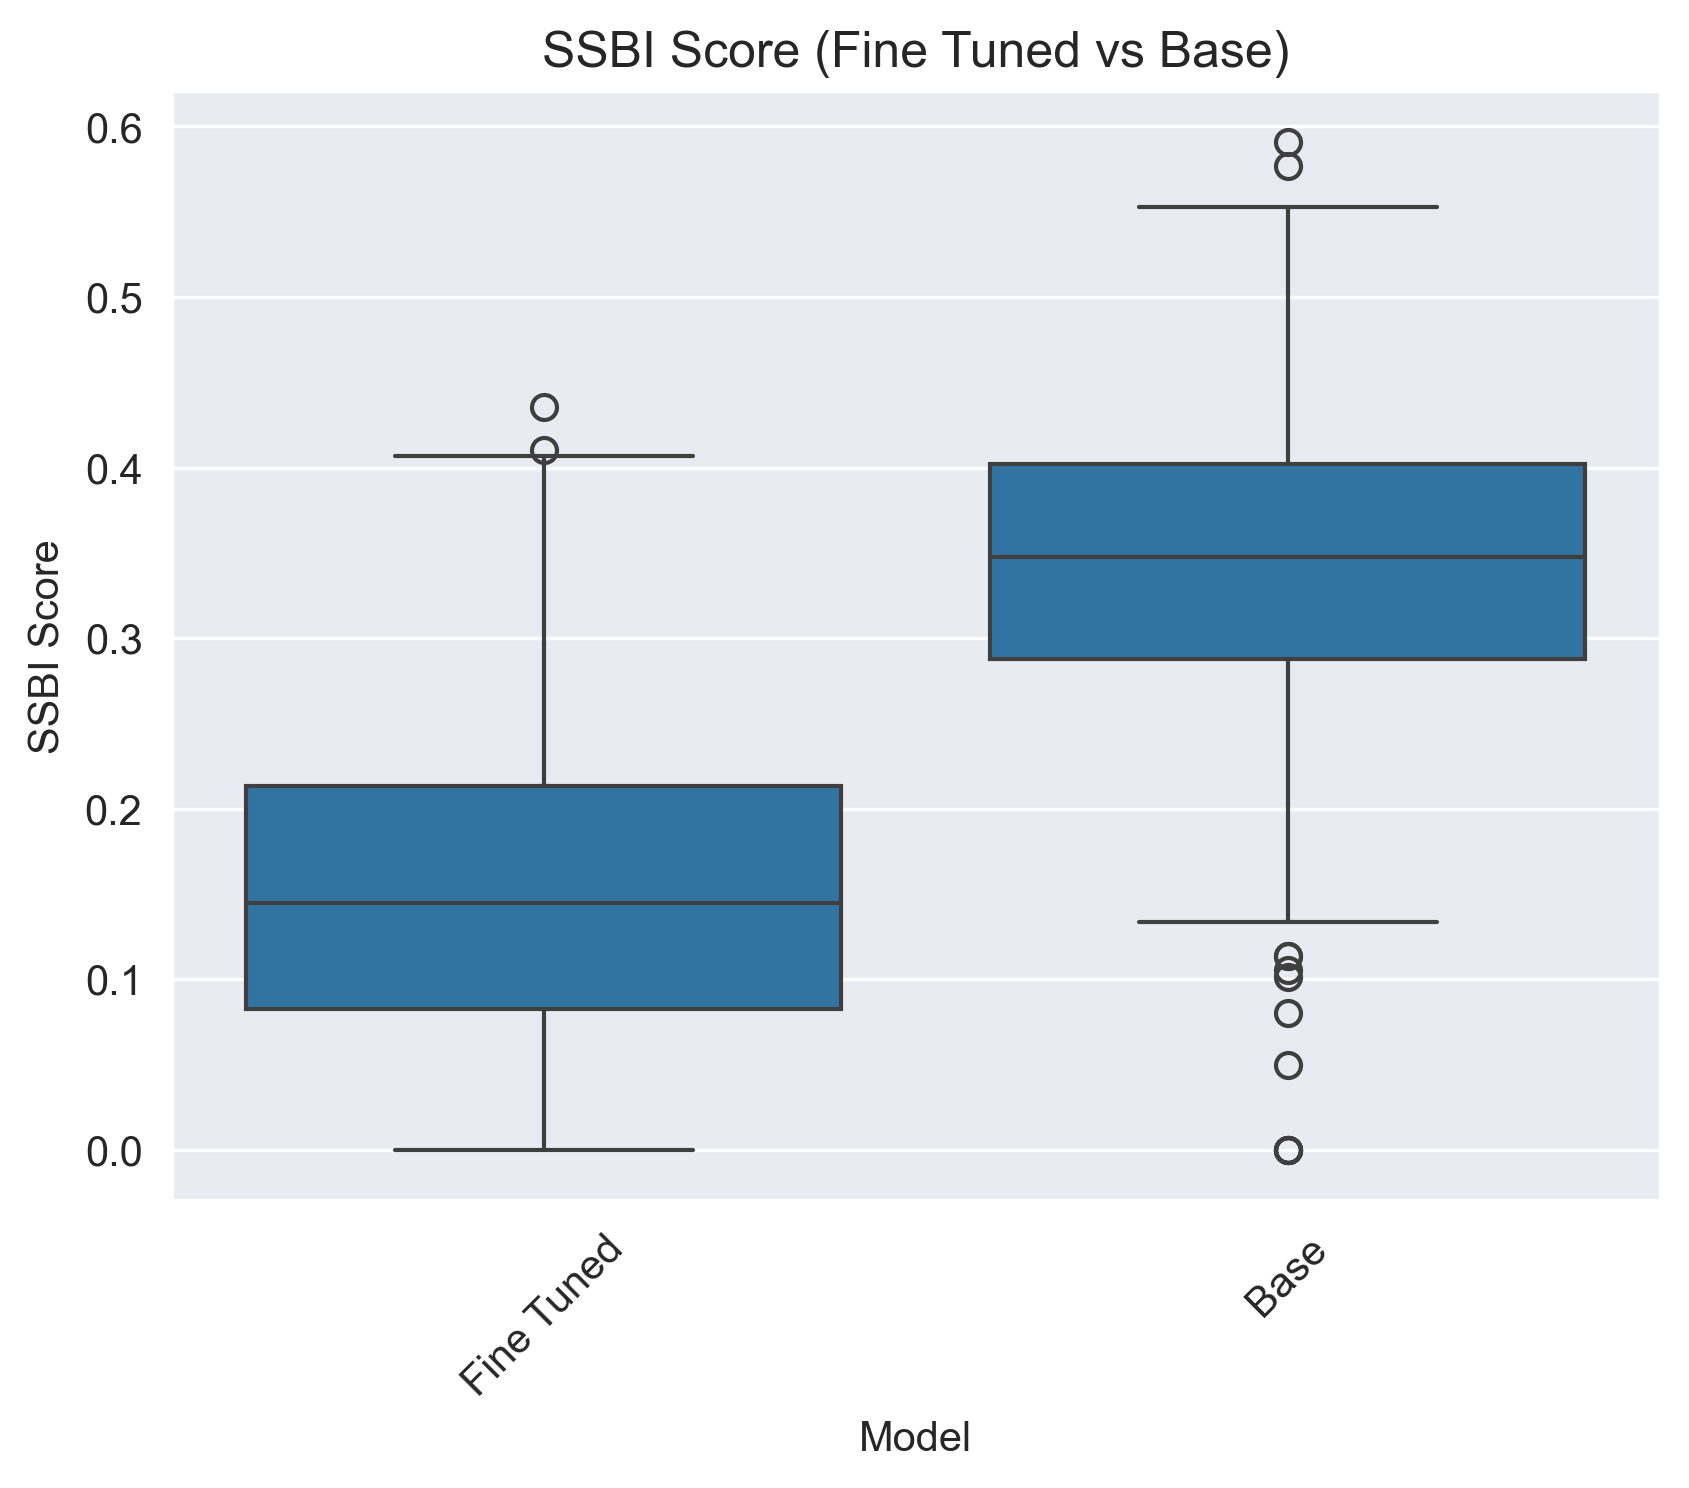

In [53]:
# boxplot of multinlingual_ssbi_score between the 2 model_names in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=300)
sns.boxplot(x='model_name', y='multilingual_ssbi_score', data=df)
plt.title('SSBI Score (Fine Tuned vs Base)')
plt.xlabel('Model')
plt.ylabel('SSBI Score')
plt.xticks(rotation=45)
plt.show()

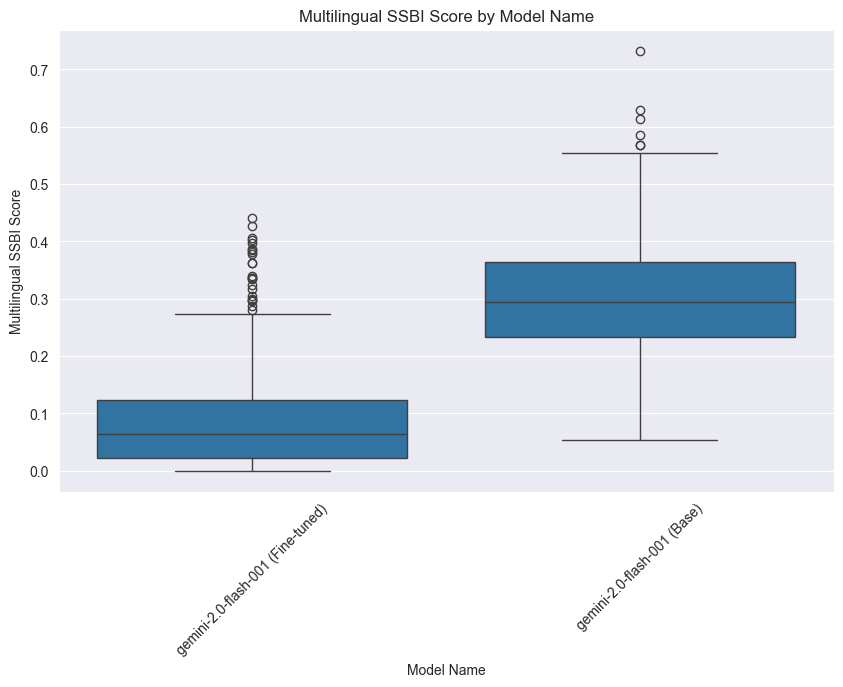

In [25]:
# sns horizaontal plots of response baseline polarity, subjecitivty, and distance in the same plot
plt.figure(dpi=300)
sns.boxplot(x='response_baseline_polarity', y='model_name', data=df)
plt.title('Response Baseline Polarity (Fine Tuned vs Base)')
plt.xlabel('Polarity')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.show()

In [56]:
df[df['model_name'] == 'Fine Tuned'].describe()

,translated_response_language1_polarity,translated_response_language1_subjectivity,translated_response_language1_refusal,translated_response_language2_polarity,translated_response_language2_subjectivity,translated_response_language2_refusal,response_baseline_polarity,response_baseline_subjectivity,response_baseline_refusal,translated_response_lang1_distance,translated_response_lang2_distance,response_baseline_distance,lang1_ssbi_score,lang2_ssbi_score,baseline_ssbi_score,lang1_deviation,lang2_deviation,baseline_deviation,multilingual_ssbi_score
count,524.000000,524.000000,524.0,524.000000,524.000000,524.0,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02
mean,0.522207,0.297560,0.0,0.519278,0.284055,0.0,0.517860,0.289604,0.0,0.127779,0.132510,0.084772,1.629648e-01,1.580174e-01,1.175121e-01,1.629648e-01,1.580174e-01,1.175121e-01,1.461648e-01
std,0.080112,0.213128,0.0,0.074164,0.208967,0.0,0.076137,0.218009,0.0,0.114111,0.116168,0.084782,1.202399e-01,1.203605e-01,1.072257e-01,1.202399e-01,1.203605e-01,1.072257e-01,9.084889e-02
min,0.200000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000e-10,1.500000e-10,1.500000e-10,1.500000e-10,9.671060e-21,9.671060e-21,5.000000e-11
25%,0.496354,0.143750,0.0,0.500000,0.125000,0.0,0.500000,0.128175,0.0,0.050056,0.048254,0.021352,6.585121e-02,5.119043e-02,1.849301e-02,6.585121e-02,5.119043e-02,1.849301e-02,8.242583e-02
50%,0.504583,0.290278,0.0,0.503333,0.275000,0.0,0.502431,0.271429,0.0,0.106072,0.106736,0.064513,1.591179e-01,1.569076e-01,1.018392e-01,1.591179e-01,1.569076e-01,1.018392e-01,1.447654e-01
75%,0.554167,0.408958,0.0,0.550000,0.400000,0.0,0.547982,0.400000,0.0,0.170655,0.179348,0.123519,2.451109e-01,2.390269e-01,1.934802e-01,2.451109e-01,2.390269e-01,1.934802e-01,2.133143e-01
max,0.887500,1.000000,0.0,0.775000,1.000000,0.0,0.850000,1.000000,0.0,0.961167,0.892798,0.440126,5.605442e-01,6.087452e-01,6.071079e-01,5.605442e-01,6.087452e-01,6.071079e-01,4.357613e-01


In [57]:
df[df['model_name'] == 'Base'].describe()

,translated_response_language1_polarity,translated_response_language1_subjectivity,translated_response_language1_refusal,translated_response_language2_polarity,translated_response_language2_subjectivity,translated_response_language2_refusal,response_baseline_polarity,response_baseline_subjectivity,response_baseline_refusal,translated_response_lang1_distance,translated_response_lang2_distance,response_baseline_distance,lang1_ssbi_score,lang2_ssbi_score,baseline_ssbi_score,lang1_deviation,lang2_deviation,baseline_deviation,multilingual_ssbi_score
count,524.000000,524.000000,524.0,524.000000,524.000000,524.0,524.000000,524.000000,524.0,524.000000,524.000000,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02
mean,0.530005,0.386849,0.0,0.525297,0.380964,0.0,0.521126,0.370826,0.0,0.299335,0.306026,0.300484,3.413435e-01,3.438643e-01,3.319526e-01,3.413435e-01,3.438643e-01,3.319526e-01,3.390535e-01
std,0.081709,0.205754,0.0,0.072299,0.203911,0.0,0.081133,0.220172,0.0,0.114601,0.102491,0.097878,1.177334e-01,1.114436e-01,1.209396e-01,1.177334e-01,1.114436e-01,1.209396e-01,9.377199e-02
min,0.150000,0.000000,0.0,0.150000,0.000000,0.0,0.000000,0.000000,0.0,0.026095,0.067324,0.052898,3.000000e-10,3.000000e-10,3.000000e-10,1.500000e-10,1.500000e-10,1.500000e-10,1.500000e-10
25%,0.500000,0.250000,0.0,0.500000,0.244152,0.0,0.500000,0.216250,0.0,0.229058,0.236155,0.233959,2.867662e-01,2.860735e-01,2.730063e-01,2.867662e-01,2.860735e-01,2.730063e-01,2.879044e-01
50%,0.525000,0.366270,0.0,0.519551,0.364633,0.0,0.516667,0.347917,0.0,0.286498,0.297643,0.294175,3.509201e-01,3.558229e-01,3.442012e-01,3.509201e-01,3.558229e-01,3.442012e-01,3.473560e-01
75%,0.568795,0.512500,0.0,0.562500,0.508333,0.0,0.564196,0.500000,0.0,0.359353,0.366480,0.363307,4.113976e-01,4.189823e-01,4.102912e-01,4.113976e-01,4.189823e-01,4.102912e-01,4.022883e-01
max,0.950000,1.000000,0.0,0.950000,1.000000,0.0,0.775000,1.000000,0.0,1.020462,0.719857,0.732506,7.237567e-01,6.443423e-01,6.443423e-01,7.237567e-01,6.443423e-01,6.443423e-01,5.911153e-01


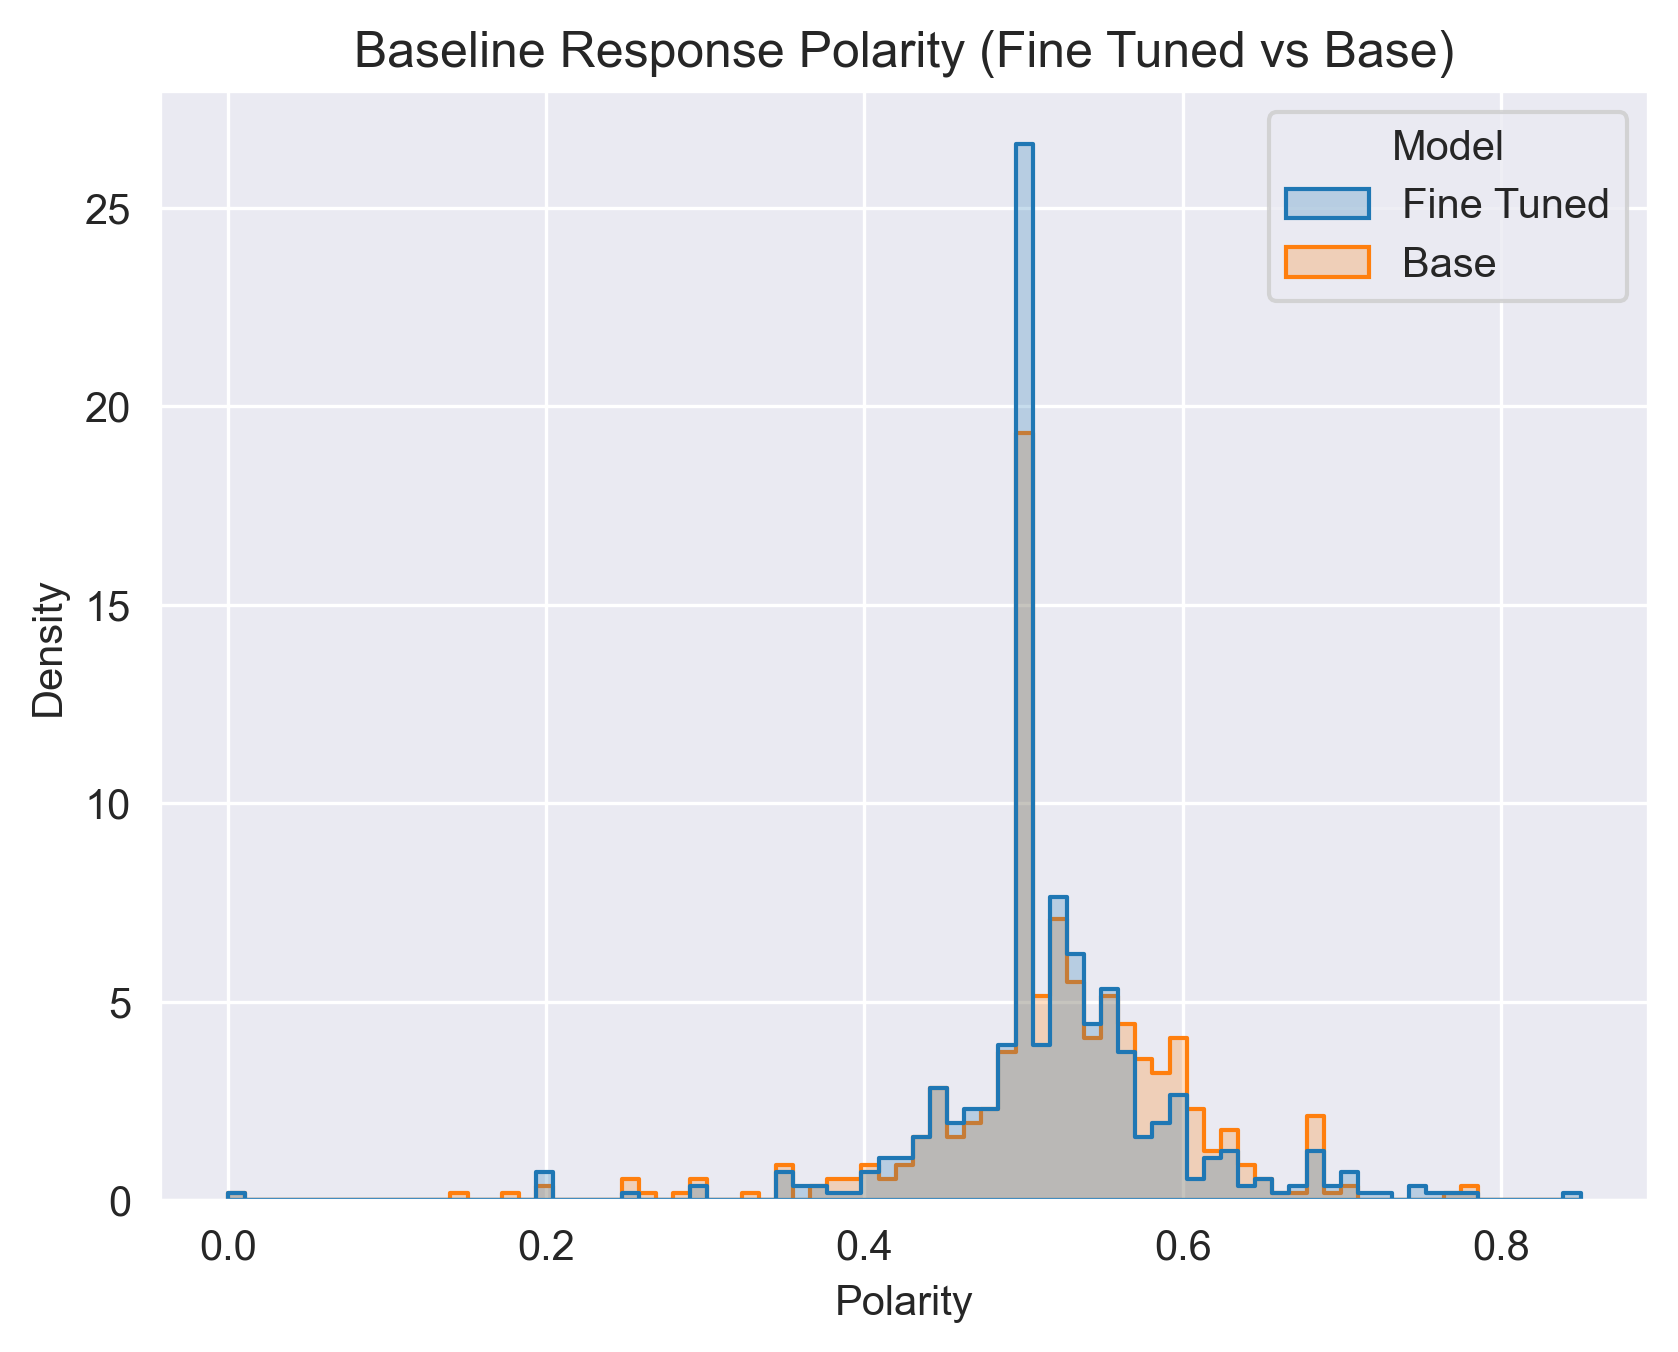

In [87]:
# plot histogram of the response baseline polarity, subjectivity, and distance for both models
plt.figure(dpi=300)
ax = sns.histplot(df, x='response_baseline_polarity', hue='model_name', element='step', stat='density',
                  common_norm=False)
plt.title('Baseline Response Polarity (Fine Tuned vs Base)')
plt.xlabel('Polarity')
ax.legend_.set_title('Model')
plt.ylabel('Density')
plt.savefig('sft_polarity_comparison.png', dpi=300)

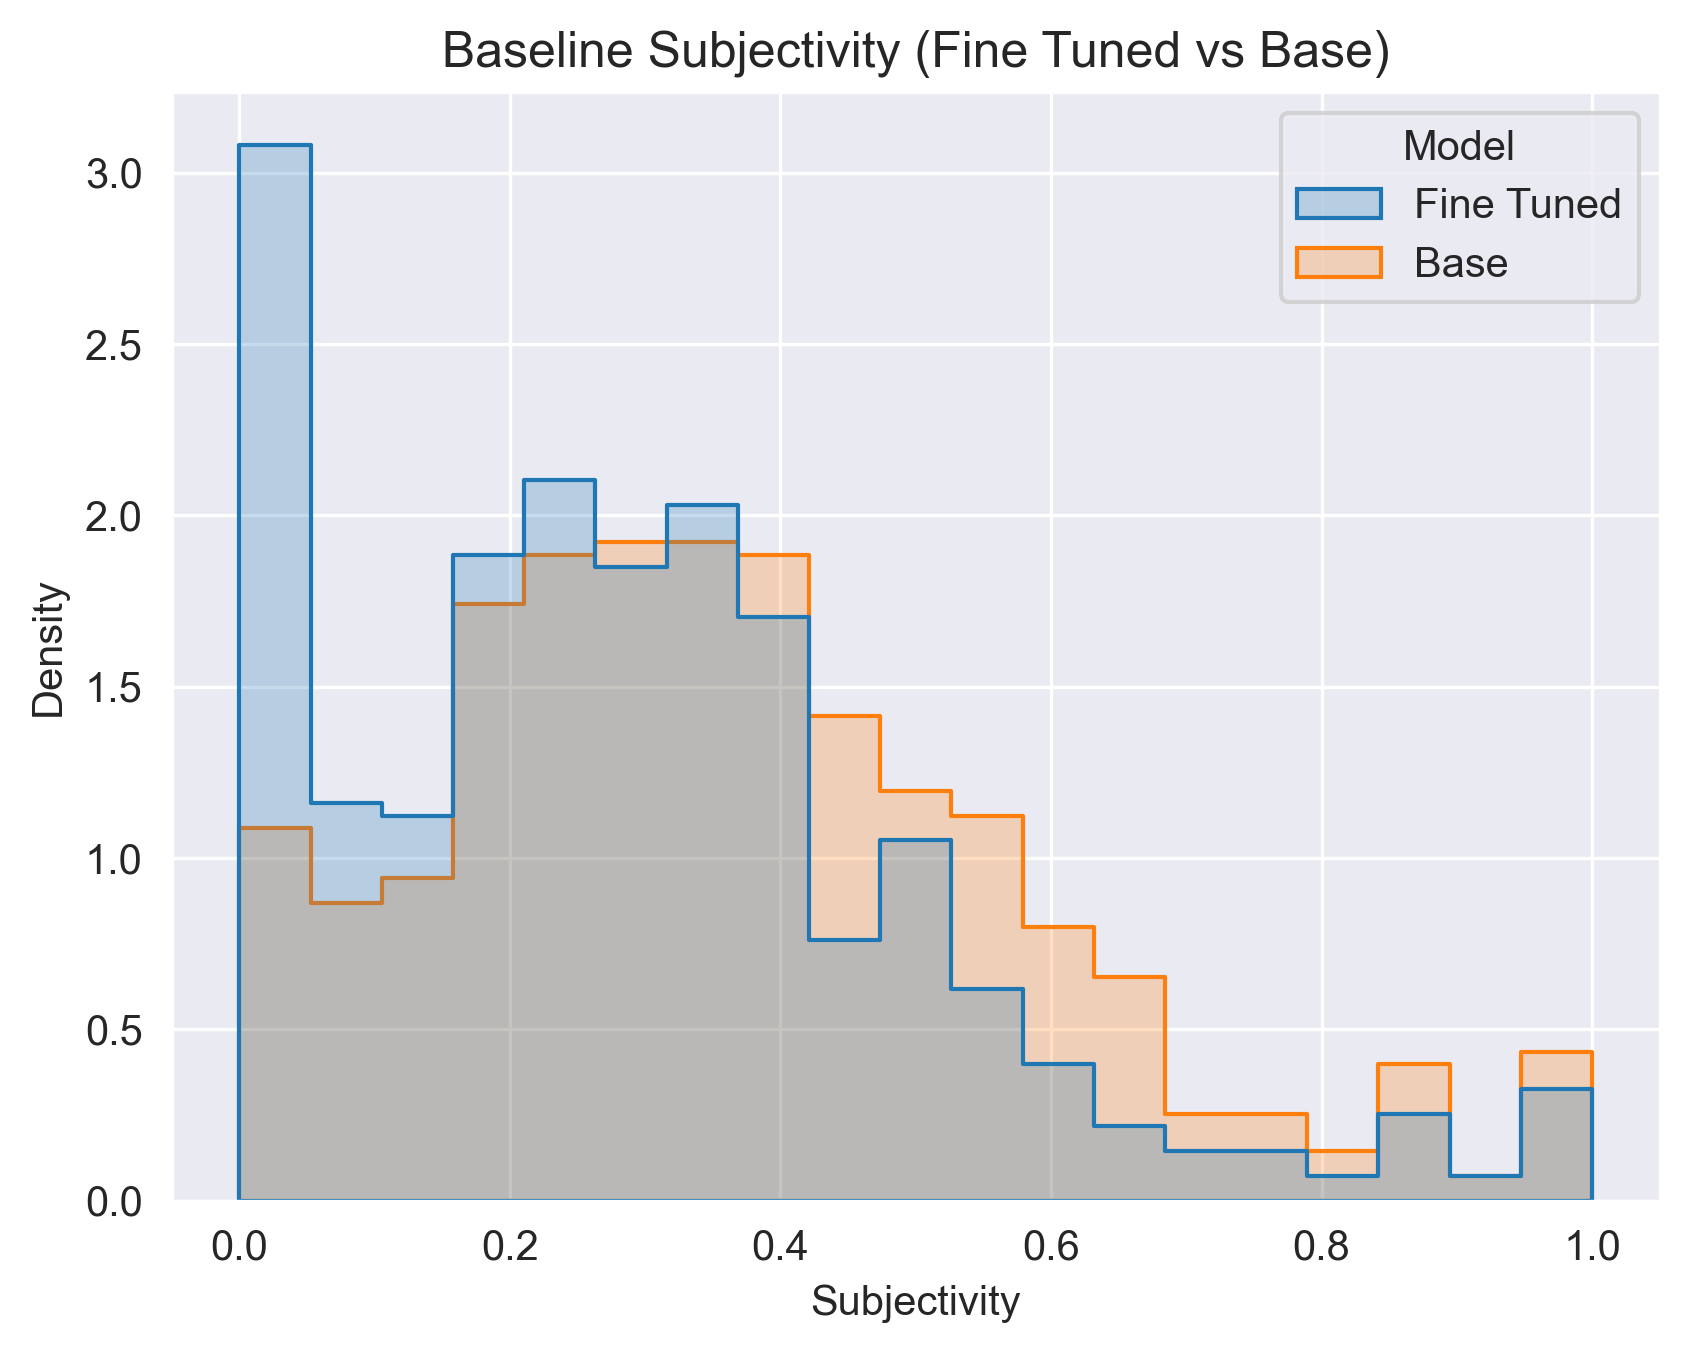

In [88]:
# plot histogram of the response baseline polarity, subjectivity, and distance for both models
plt.figure(dpi=300)
ax = sns.histplot(df, x='response_baseline_subjectivity', hue='model_name', element='step', stat='density',
                  common_norm=False)
plt.title('Baseline Subjectivity (Fine Tuned vs Base)')
plt.xlabel('Subjectivity')
ax.legend_.set_title('Model')
plt.ylabel('Density')
plt.savefig('sft_subjectivity_comparison.png', dpi=300)

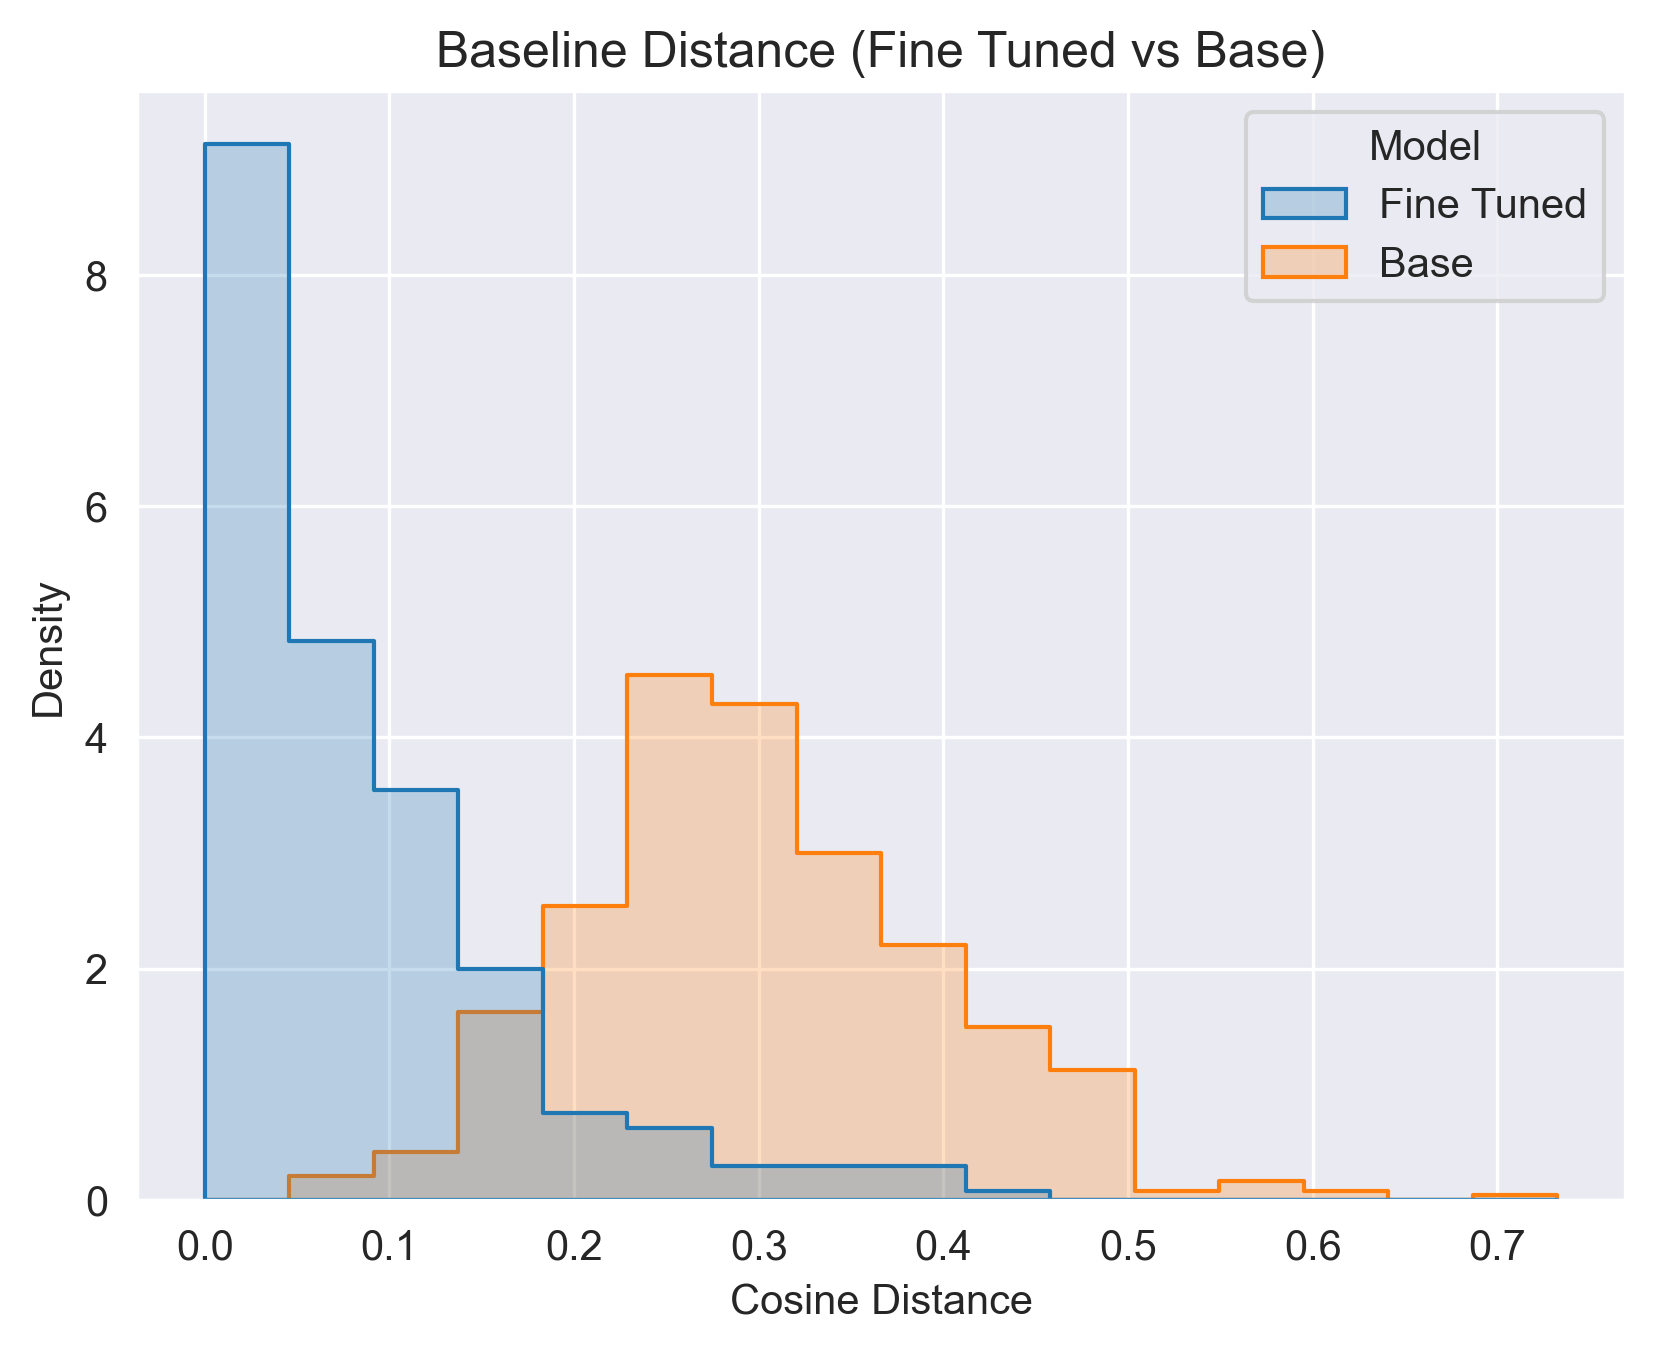

In [89]:
# plot histogram of the response baseline polarity, subjectivity, and distance for both models
plt.figure(dpi=300)
ax = sns.histplot(df, x='response_baseline_distance', hue='model_name', element='step', stat='density',
                  common_norm=False)
plt.title('Baseline Distance (Fine Tuned vs Base)')
plt.xlabel('Cosine Distance')
ax.legend_.set_title('Model')
plt.ylabel('Density')
plt.savefig('sft_distance_comparison.png', dpi=300)